## A Hands-on Introduction to Machine Learning using Python on Kaggle 

### Session 2 of Workshop series at Murty Sunak Quantitative and Computing Lab, CMC

#### Instructor: Aashita Kesarwani


This is the notebook for the second session of the [A Hands-on Introduction to Machine Learning using Python on Kaggle workshop series at CMC](https://github.com/CMC-QCL/A-hands-on-introduction-to-Machine-Learning-using-Python-on-Kaggle/blob/master/Session%201/Session%201.ipynb).

### Supervised learning algorithms:
- Regression
- Classification 

## Regression:  
- Determining the impact of response variables on the target variable. 
- Fitting a curve using training data to estimate target variable for unseen data

<img src="https://upload.wikimedia.org/wikipedia/commons/8/8a/Gaussian_kernel_regression.png" width="300" height="350" />
<p style="text-align: center;"> Regression curve </p> 

Let us see a demonstrative example of simple linear regression using the [diabetes dataset](https://scikit-learn.org/stable/datasets/index.html#diabetes-dataset) from the [sklearn.datasets](https://scikit-learn.org/stable/datasets/index.html). First we import python modules and the dataset:

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.simplefilter('ignore')

from sklearn import datasets
diabetes = datasets.load_diabetes()
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


The dataset has many features (or variables), but we will pick only the BMI so as to be able to plot and visualize the relationship between input and target variables.

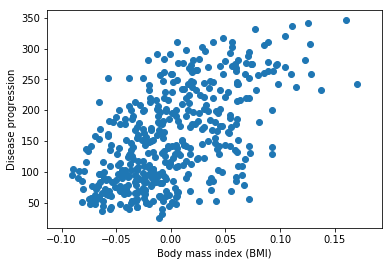

In [2]:
X = df['bmi'].values
Y = diabetes.target

plt.scatter(X, Y);
plt.xlabel('Body mass index (BMI)');
plt.ylabel('Disease progression');

Let us pick a few points from the dataset and try to fit a line.

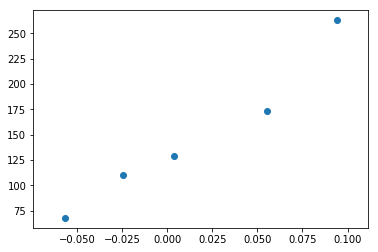

In [3]:
import random
random.seed(0)
idx = random.sample(range(len(df)), 5)
x1, y1 = X[idx], Y[idx]
plt.scatter(x1, y1);

In [4]:
def plot_line(w, b):
    x_values = np.linspace(X.min(), X.max(), 100)
    y_values = w*x_values + b
    plt.plot(x_values, y_values, 'r-')

We guess values for slope and intercept by trial-and-error:

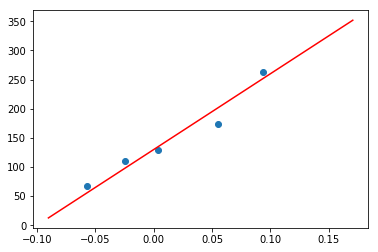

In [5]:
w = 1300
b = 130
plt.scatter(x1, y1);
plot_line(w, b);

As we add more points, the slop and intercept of the line needs to be adjusted accordingly.

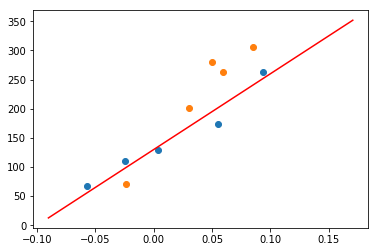

In [6]:
random.seed(12)
idx = random.sample(range(len(df)), 5)
x2, y2 = X[idx], Y[idx]
plt.scatter(x1, y1);
plt.scatter(x2, y2);
plot_line(w, b);

Try a few values of weights closer to the ones above and see which seems to fit best. 

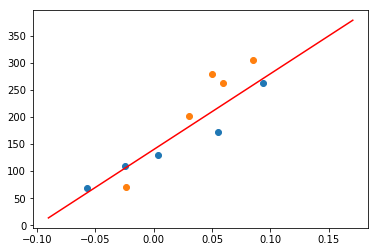

In [7]:
w = 1400
b = 140
plt.scatter(x1, y1);
plt.scatter(x2, y2);
plot_line(w, b);

In a nutshell, we are trying to find the optimal value for the slope and intercept for the line and we are learning from the training examples. Our objective is to minimize the difference between the actual $y$ value and the value predicted using the line. 

<img src="http://www.ken-szulczyk.com/misc/statistics/linear_regression.png" width="300" height="300" />

In [8]:
x = np.concatenate([x1, x2])
y = np.concatenate([y1, y2])
y_pred = w*x + b
error = y - y_pred
pd.DataFrame({'x': x, 'y': y, 'y_pred': y_pred, 
              'error': error})

,x,y,y_pred,error
0,0.055229,173.0,217.321068,-44.321068
1,0.003494,129.0,144.892096,-15.892096
2,-0.024529,110.0,105.659737,4.340263
3,0.094031,263.0,271.642796,-8.642796
4,-0.056863,68.0,60.391630,7.608370
5,-0.023451,71.0,107.168674,-36.168674
6,0.049840,280.0,209.776383,70.223617
7,0.085408,306.0,259.571301,46.428699
8,0.030440,202.0,182.615519,19.384481
9,0.059541,263.0,223.356815,39.643185


The simple linear regression (linear regression with one variable) is formulated as $ y_{pred} = w * x + b $.

To find the optimal values for $w$ and $b$, we need to quantify the cost function (also known as the error function or the loss function) that we can minimize. 

* How do we formulate it?
* Should we sum up the errors? If not, why?

The simple linear regression model uses the mean-squared error (MSE) as the cost function. We square the errors and then take their average.

$$ J = \frac{1}{2 n} \sum_{i=1}^n (y^{(i)} - y_{pred}^{(i)})^2 $$

The [gradient descent algorithm](https://machinelearningmastery.com/gradient-descent-for-machine-learning/) is used to update the weights iteratively in the direction of the steepest descent of the cost function. 

$$ w := w - \alpha \nabla J $$

where $\nabla J$ is the gradient of the cost function $J$ and $\alpha$ is the learning rate that determines the size of steps that we take descending on the path of gradient.

<img src="https://rasbt.github.io/mlxtend/user_guide/general_concepts/gradient-optimization_files/ball.png" width="350" height="450" />
<p style="text-align: center;"> Minimizing the cost function using gradient descent </p> 



To summarize, we defined a cost function to quantify the error in predicting outputs and then we update the weights so as to minimize the cost in the fastest way with the help of gradient descent algorithm.

The same formulation and understanding can be extended to linear regression with more than one variable, say $x_1, x_2, \dots, x_n$ with the equation 

$$ y_{pred} = b + w_1 * x_1 + w_2 * x_2 + \cdots + w_n * x_n$$ 

And we estimate the weights $w_1, w_2, \dots, w_n$ corresponding to each variable as well as the intercept by minimizing the cost function using gradient descent.

Scikit-learn has an implementation of the linear regression as demonstrated below. First we import the function [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) and then initialize the regressor.

In [9]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

Then we train the regressor using the `fit()` method on the smaller set of data points.

In [10]:
x = x.reshape(-1, 1)
lin_reg.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [11]:
w = lin_reg.coef_[0]
b = lin_reg.intercept_
w, b

(1623.2592118335656, 142.16229567728112)

How does the values for the slope and intercept compare with the ones you guessed earlier?

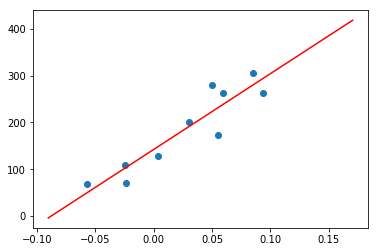

In [12]:
plt.scatter(x, y);
plot_line(w, b);

Next, we train the regressor on the entire dataset and fit a line.

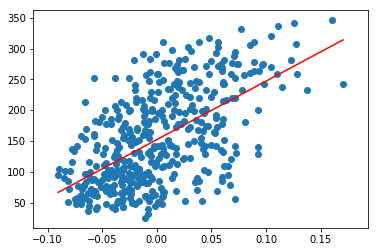

In [13]:
X = X.reshape(-1, 1)
lin_reg.fit(X, Y)
w = lin_reg.coef_[0]
b = lin_reg.intercept_
plt.scatter(X, Y);
plot_line(w, b);

The feature BMI does not seem to possess a linear relationship with the disease progression. The coefficient of determination (denoted by $R^2$) is a statistical measure of how close the data are to the fitted regression line and it can be calculated using `score()` method.

In [14]:
lin_reg.score(X, Y)

0.3439237602253803

So, the R-sqaured is around 34%, which is somewhat low.

$R^2$ is one of the metric for evaluating regression models. Following are some data points plots for demonstration, the first two have $R^2$ equal to 1 and the last two with $R^2$ equal to 0.


<div style="display:flex">
     <div style="flex:1;padding-right:5px;">
          <img src="http://www.ken-szulczyk.com/misc/statistics/correlation_01.gif" width="200" height="200">
     </div>
     <div style="flex:1;padding-left:5px;">
          <img src="http://www.ken-szulczyk.com/misc/statistics/correlation_02.gif" width="200" height="200">
     </div>
     <div style="flex:1;padding-left:5px;">
          <img src="http://www.ken-szulczyk.com/misc/statistics/correlation_03.gif" width="400" height="400">
     </div>
</div>


## Classification: 
- Predicting a label to classify the data points.
- Finding a decision boundary using a labeled training dataset to determine labels for unseen data.

An example of binary classification algorithm: Logistic regression - separates the classes using a linear boundary 

<img src="https://camo.githubusercontent.com/f663cd4f29335972950dded4d422c07aeee8af55/68747470733a2f2f63646e2d696d616765732d312e6d656469756d2e636f6d2f6d61782f313630302f312a34473067737539327250684e2d636f397076315035414032782e706e67" width="300" height="350" />
<p style="text-align: center;"> Logistic Regression classifier </p>

For binary classification, we assign the two classes the labels 0 and 1. The class labeled 1 is also called the positive class. The classifier predicts the probability ($p$) that an observation belongs to the positive class. The probability for the class labeled $0$ (or the negative class) would be $1-p$.

To build a linear classifier, also known by its misnomer logistic regression, is same as finding a function for probability that gives a value close to 1 for points in the upper region (or the points in the positive class) and a value close to 0 for points in the lower region (or the points in the negative class). 

In the context of neural networks, such a function is called an activation function. They are said to be fired or not depending on whether $f \to 1$ or $f \to 0$ for the input. The logistic classifiers are one of the simplest cases of the neural networks pared-down to a single layer. And they are called so, because they use one of the most commonly used activation function called logistic (or sigmoid) function. 

$$sig(t) = \frac{1}{1+e^{-t}}$$

<img src="https://upload.wikimedia.org/wikipedia/commons/5/53/Sigmoid-function-2.svg" width=400 />

The S-shaped curve is called sigmoid because of its shape and it was widely used in population growth models in the previous century and hence, the [name logistic](https://en.wikipedia.org/wiki/Logistic_function).

Our main objective for a classification task is to find the optimal decision boundary to separate the classes. For the logistic regression, the boundary is linear. For the case of two features, this linear boundary is simply a line in 2-dimensional plane, whereas for three features, the linear boundary would be a linear plane separating the two classes in 3-dimensional plane and in general, a $n-1$ dimensional linear hyperplane in a $n$-dimensional space.

<img src="https://camo.githubusercontent.com/f663cd4f29335972950dded4d422c07aeee8af55/68747470733a2f2f63646e2d696d616765732d312e6d656469756d2e636f6d2f6d61782f313630302f312a34473067737539327250684e2d636f397076315035414032782e706e67" width="300" height="250" />
<p style="text-align: center;"> Logistic Regression classifier </p>

Finding this linear decision boundary boils down to finding the weights $w_1, w_2, \dots, w_n$ and the slope $b$. The equation for linear regression seen above was given by the line itself $$ y_{pred} = b + w_1 * x_1 + w_2 * x_2 + \cdots + w_n * x_n$$

For the logistic classifier, we will classify the points based on which region they fall into and output the probability that they belong to the positive class. This should be reflected in the equation for the logistic classifier and we use the sigmoid (logistic) function for that purpose. 

To be able to visualize and understand intuitively, we will first crack the formulation of logistic classifier in the case of two features, say $x_1$ and $x_2$, as seen in the figure above.

Math question: We represent the following line using the equation $x_1-x_2-1=0$. How do we mathematically represent the two regions that are separated by this line?

![](https://github.com/AashitaK/ML-Workshops/blob/master/Session%204/figures/fig1.png?raw=true)

The region containing the origin is given by $x_1-x_2-1<0$ whereas the other one by $x_1-x_2-1>0$.

![](https://github.com/AashitaK/ML-Workshops/blob/master/Session%204/figures/fig2.png?raw=true)

As seen above, the points in one region is characterized by $w_1*x_1 + w_2*x_2+b<0$ and the other region by $w_1*x_1 + w_2*x_2+b>0$. We combine this with the logistic (sigmoid) function above to get the equation for logistic regression:

$$Prob(y=1) = sig(w_1*x_1 + w_2*x_2 + \cdots + w_n*x_n + b) $$ 

where $sig$ is the sigmoid logistic function defined above. 

<img src="https://upload.wikimedia.org/wikipedia/commons/5/53/Sigmoid-function-2.svg" width=400 />

Observations:
* The output of the sigmoid lies between 0 and 1, which corresponds to the probability in our case. 
* The logistic function (and hence the probability) approximates to 1 for the large positive values, whereas it converges to 0 for large negative values. 
* The value for $w_1*x_1 + w_2*x_2 + \cdots + w_n*x_n + b$ is positive for points in the region on one side of the line and negative for the other. The magnitude of the values (positive or negative) is higher for points far away from the line.
* In view of the above equation for logistic regression and the properties of sigmoid logistic function, the points farther away from the line will be classified with a high probability to one class or the other, whereas the probability will be closer to 0 for points close to the line.
 
In general, we set the threshold for probability to be 0.5. This means that whenever $w_1*x_1 + w_2*x_2 + \cdots + w_n*x_n + b \geq 0$, it is classified to the positive class, whereas whenever $w_1*x_1 + \cdots + w_n*x_n + b < 0$, it is classified to the negative class. The points for which the value for $w_1*x_1 + \cdots + w_n*x_n + b$ is not large in magnitude have probabilities that are closer to 0.5. Such points needs to be classified with extra care, as we will see later on in evaluation metrics. 

To learn the weights $w_1, w_2, \dots, w_n$ and $b$, we quantify the error of misclassification using the cost function called the cross-entropy log loss defined below.

For points with label $y=1$, the cost is

$$ c(y, p) = - \log(p) \ \ \ \ \ \ \ \ \ \text{ if }\ \  y = 1$$

whereas for points with label $y=0$, the cost is

$$ c(y, p) = - \log(1-p) \ \  \text{ if }\ \  y = 0$$

The cost function takes the average over the costs for all points. The costs for the two classes $y=0$ and $y=1$ can be summed up in the following formula.

$$ J = \frac{1}{N} \sum_{i=1}^N c(y, p) = - \frac{1}{N} \sum_{i=1}^N y \log(p) + (1-y) \log(1-p)$$

where $p=Prob(y=1)$.

The updates to the weights are made in a similar fashion as seen earlier for linear regression by minimizing the cost function using gradient descent algorithm.

We will first generate a dataset suitable for demonstration and applying classification algorithms using built-in function [`make_classification`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) in scikit-learn.

In [15]:
# Create dataset for classification
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=100, n_features=2, 
                           n_redundant=0, n_informative=2, 
                           n_clusters_per_class=2, 
                           random_state=1)

The binary classification dataset containing two features (or variables) is plotted below. 

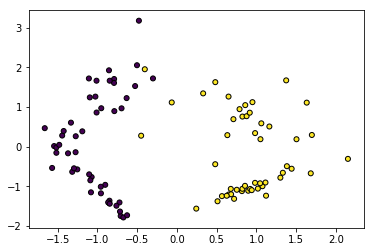

In [16]:
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k');

We create a logistic classifier using [`sklearn.linear_model.LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [17]:
# Train a classifier
from sklearn.linear_model import LogisticRegression
LR_clf = LogisticRegression()

Next we train the classifier using the training data:

In [18]:
LR_clf.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Now, we test the accuracy of the classifier on both training and testing dataset.

In [19]:
print('Accuracy of Logistic regression classifier: {:.2f}'
     .format(LR_clf.score(X, y)))

Accuracy of Logistic regression classifier: 0.98


We define the function to plot the decision boundaries of the classifier:

In [20]:
def plot_decision_boundary(model, X, y):
    x1, x2 = X[:, 0], X[:, 1]
    x1_min, x1_max = x1.min() - 1, x1.max() + 1
    x2_min, x2_max = x2.min() - 1, x2.max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1),
                         np.arange(x2_min, x2_max, 0.1))

    Z = model.predict(np.c_[xx1.ravel(), xx2.ravel()]).reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.4)
    plt.scatter(x1, x2, c=y, marker='o',
                s=25, edgecolor='k');

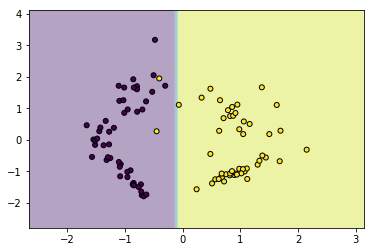

In [21]:
plot_decision_boundary(LR_clf, X, y)

Three classifiers A, B and C are trained on a given labeled dataset. The accuracy of the trained classifiers in predicting the labels correctly on the same dataset is as follows.

|Models | Accuracy| 
|---|---|
| Model A | 90%|
| Model B | 80%|
| Model C | 70%|

Clearly, model A is better at predicting labels for the training data than model B and C. Do you think model A will do a better job in predicting labels for yet unseen data as well?

To answer this question, let us first briefly review the learning process for logistic classifiers, which is similar in essence to the learning process of a lot of different regression and classification algorithms including neural networks.

#### What does the machine learn?

Answer: Model parameters (or weights) specific for each classification/regression algorithm.

#### How does the machine learn the parameters (or weights)?

Model parameters (or weights) are updated to keep on ***minimizing the cost function*** iteratively using the training data. The cost has distinctive mathematical formulations for various algorithms but the gist of the learning process is the same.


***When to stop the iterative learning process? Until the cost function has reached its minimum value?*** 

To answer the question, let us consider this binary classification problem. 
<img src="https://upload.wikimedia.org/wikipedia/commons/1/19/Overfitting.svg" width="250" height="250" />

* Which of the two decision boundaries (black or green) will have a lower value for the cost function?
* Which decision boundary would you prefer for classifying the unseen examples?

Since the cost function is calculated solely based on the training dataset, minimizing it too much might mean that the model do not generalize well to unseen examples. This is called overfitting. 

***Over-fitting and under-fitting to the training set***  
The models can over-train on a dataset, that is they learn the dataset so well that they do not generalize well to the examples outside of that dataset. 

If we try to fit too complex of a curve as the decision boundary separating the classes and we don't have enough training examples to estimate the parameters for the curve, then we suffer from over-fitting.

On the other hand, if we try separating the classes with an over-simplified curve as the decision boundary and we have enough training examples to estimate a curve that would be a better fit, then we suffer from under-fitting. 

<img src="https://vitalflux.com/wp-content/uploads/2015/02/fittings.jpg" width="600" height="800" />

How do we know whether our model is overfitting or underfitting to the training set?

Answer: At the beginning, we save some examples as the validation set and use it to test the performance of the model. 

|Models | Accuracy on the training set | Accuracy on the validation set | 
|---|---|---|
| Model A | 90%| 70% |
| Model B | 80%| 75% |
| Model C | 70%| 65% |

* With this additional information, can you guess which model will likely perform better for the unseen data?
* Which of these three models would you suspect for overfitting to the training data?
* Which of these three models would you suspect for underfitting to the training data?

The problem for over-fitting and under-fitting and the underlying reasons of model complexity is the same for regression as well.

<img src="https://docs.aws.amazon.com/machine-learning/latest/dg/images/mlconcepts_image5.png" width="600" height="800" />

#### Key take-aways so far:
- Always save some examples from the datasets for testing model performance.
- Pay attention to the model performance on the validation set rather than solely on the training set.
- Watch out for both under-fitting and over-fitting.

#### Steps for model building will be as follows.

Split the dataset into training and testing sets:

In [22]:
# Split the dataset into testing and validation
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=0)

Train the classifier on training set:

In [23]:
LR_clf = LogisticRegression().fit(X_train, y_train)

Test the accuracy on both training and validation set:

In [24]:
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(LR_clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(LR_clf.score(X_valid, y_valid)))

Accuracy of Logistic regression classifier on training set: 0.99
Accuracy of Logistic regression classifier on test set: 0.96


#### How to address overfitting?
- Reduce the number of features 
    - Discard some features
    - Dimensionality reduction techniques such PCA, LDA, etc.
- Simplify the model (by tuning hyperparameters)
- Early termination (reducing the number of iterations for training)
- Regularization, if applicable
- Add more training examples, if possible  
<img src="https://i.stack.imgur.com/rpqa6.jpg" width="450" height="600" />

In a nutshell, to reduce overfitting, reduce complexity.
To reduce underfitting, enhance complexity.


The following concepts in machine learning - k-fold Cross-validation and dimensionality reduction - are useful for building classification and regression models, no matter the choice of the algorithm. 

## k-fold Cross-validation

**Cross-validation**: 

To address overfitting and underfitting to the curve, we hold out a validation set to evaluate our model. This valiadation set gives us an estimate for how well our model will generalize to unseen data. We similarly use this validation set to tune the hyperparameters, for example finding the optimal value for the regularization parameter alpha. This cross-validation method has a shortcoming similar to overfitting. The overfitting happens when our model captures noise and patterns present in the training dataset that are not present in the unseen data. It can also happen that our split of the training and validation is not entirely random, and that one of the subset has patterns/characteristics not present in the entire dataset. More commonly, it happens that when we use validation set to tune our hyperparameters, they often overfit to the validation set. For example, we find an optimal value for the regularization parameter using a validation set, and it turned out to be not-so-optimal for the unseen test data. To solve this problem, it is a common practise to use k-fold cross-validation, especially for tuning hyperparameters.

1. Randomly divide the dataset into k-groups
2. For each group, we train the algorithm on the remaining k-1 groups and evaluate its performance on this group treating it as the validation set. 

Thus, we train k different models and have performance scores for each one of them. At the end, we take the median of the scores and also make note of their standard deviation.
![](https://i.stack.imgur.com/nFkpn.png)

Scikit-learn has a built-in function [`sklearn.model_selection.cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) to calculate the cross-validation scores. We can set the number of folds using the parameter `cv` and choose from various scoring methods. We initailize a classifier and use it with the entire dataset.

In [25]:
# First we define a classifier, we do not need to train it
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

# cross_val_score method makes k-folds and train the 
# classifier k times and returns k scores for each run
from sklearn.model_selection import cross_val_score
# accuracy is the default scoring metric
print('Cross-validation (accuracy)', cross_val_score(clf, X, y, cv=5))
# use Area Under ROC as scoring metric
print('Cross-validation (AUC)', cross_val_score(clf, X, y, cv=10, scoring = 'roc_auc'))
# use recall as scoring metric
print('Cross-validation (recall)', cross_val_score(clf, X, y, cv=3, scoring = 'recall'))
# use precision as scoring metric
print('Cross-validation (precision)', cross_val_score(clf, X, y, cv=3, scoring = 'precision'))
# use F1-score as scoring metric
print('Cross-validation (F1-score)', cross_val_score(clf, X, y, cv=3, scoring = 'f1'))

Cross-validation (accuracy) [0.9  1.   0.95 1.   1.  ]
Cross-validation (AUC) [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Cross-validation (recall) [0.94117647 0.94117647 1.        ]
Cross-validation (precision) [1. 1. 1.]
Cross-validation (F1-score) [0.96969697 0.96969697 1.        ]


The result is the validation score for each fold.

## Dimensionality reduction (Optional):

Many a times, our real-world dataset contains too many features. Using all the features can lead to a very complex model that would be prone to overfitting if we do not have the sufficient number of training examples in our dataset. A simple way to address this is to discard features.

Q: How do we know which features to discard? 

Sometimes, the features that do not seem to have much impact on the target variable individually might prove to be very useful in conjunction with other features. If we do not want to risk losing information by discarding features, we use dimensionality reduction techniques. The most commonly used one is Principal Component Analysis (PCA).


### Principal Component Analysis (PCA):

If we have 100 features, we can think of having 100 dimensional feature space with an axis for each feature. In essence, we transform our 100 old features into 100 new ones, ranked in the order of importance. To accomplish this, we rotate the axis of the features to capture the most variability of data in our first principal axis and then try to capture as much from the remaining variability as possible in the second axis and so on. We ultimately keep only as many features as we want, discarding the least important ones and thus, reducing the dimension.

![](https://www.researchgate.net/profile/Nicholas_Czarnek/publication/320410861/figure/fig7/AS:551041819447302@1508390015760/Example-application-of-principal-component-analysis-to-simple-synthetic-data-The-black.png)

In the figure, we have transformed the two dimensional data using PCA. If we want to reduce it to one-dimension, we will simply discard the principal component 2, having captured most of the variability in the principal component 1.  The downside of PCA is that the new features are no longer as interpretable, and unlike the old features, we cannot explain what they exactly represent. The upside is that we have captured as much variability as possible in fewer features.

PCA is useful in machine learning for purposes other than dimensionality reduction. The linear models rely on the assumption that the features are independent of each other. In general, features from real-world datasets are not entirely independent, but if we transform them using PCA, the new features become independent of each other. This makes new features much more suited to build linear models such as linear/ridge/lasso regression and logistic classifier. Other uses of this technique involves data compression and visualization of data (when the number of features are reduced to 2 or 3).

The steps in PCA are outlined below. It would be Okay to skip this and revisit later after learning/revising linear algebra, especially eigen-values and eigen-vectors.
* First create a matrix for which each row is an observation and each column is a feature (similar to our dataframe, but all columns must be numerical values). 
* Center each column around zero by substracting the respective mean from each column.  
* Compute the covariance matrix
* Find the eigen values and the eigen vectors for the covariance matrix. 
* Normalize each of the eigenvector to become unit vector.

We pick the largest eigen value and the corresponding eigen vector becomes our first principal component (or first new axis). The eigen vector corresponding to the second largest eigen value becomes our second component and so on.

Note: We must always normalize the data before PCA. 

The following is the implementation of PCA using [`sklearn.decomposition.PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

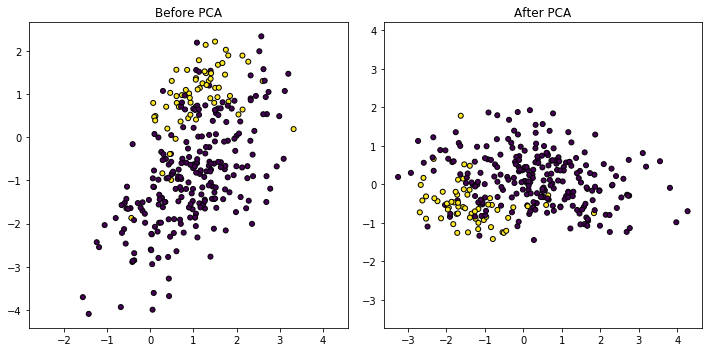

In [26]:
# First we create a dataset for demonstration
from sklearn.datasets import make_classification
X1, y1 = make_classification(
    n_samples=300, n_features=2, 
    n_redundant=0, n_informative=2, 
    n_classes=2, n_clusters_per_class=1, 
    class_sep=1, weights=[0.8, 0.2],
    flip_y=0.05, random_state=0 
)

# We fit the PCA transformer and transform our dataset
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X1)
X_pca = pca.transform(X1)

# Plotting
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Before PCA")
plt.axis("equal")
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=y1,
            s=25, edgecolor='k');
plt.subplot(1, 2, 2)
plt.title("After PCA")
plt.axis("equal")
plt.scatter(X_pca[:, 0], X_pca[:, 1], marker='o', c=y1,
            s=25, edgecolor='k');
plt.tight_layout()

Another dimensionality reduction technique is [Linear Discriminant Analysis (LDA)](https://sebastianraschka.com/Articles/2014_python_lda.html). LDA is similar to PCA except that it tries to maximize the class separation instead of data variance.
<img src="https://sebastianraschka.com/images/blog/2014/linear-discriminant-analysis/lda_1.png" width="500" height="500"/>

## Evaluation metrics for classification

Suppose we want to use machine learning to detect patients' in risk of developing a rare type of cancer. We are given a dataset consisting of certain features derived from subjects' past medical history and information about whether they develop the cancer later on.

Q: Can this be framed as a regression, classification task or neither?   
Q: If yes, what are the features?    
Q: What is the target variable?  
Q: How do we know how good is our model and how do we compare different models?   


### Classification accuracy:
$$\text{Accuracy} = \frac{\text{Number of correct predictions}}{\text{Total number of predictions made}}$$

Suppose, only 1% of the subjects in our dataset are diagonized with the cancer. We trained a classifier that correctly detects almost all the subjects with cancer, but also misclassify certain subjects that do not have it. The total accuracy of our classifier is 96%. 

Q: If we are given another classifier that have an accuracy of 99%. Should we prefer it over ours?   
Q: If not, why? What additional information we would like to have to decide?

To answer this, suppose I built a dummy classifier that always predict that a subject do not have cancer. It will be right 99% of the time and hence 99% accuracy. This suggests that accuracy is not a good metric when the classes are imbalanced. 

Q: Suppose we were able to get additional dataset and now almost half of the subjects in our dataset were diagonized with the cancer. Is accuracy now a good choice to compare two classifiers?

Key takeaway: Accuracy is a good metric for evaluating classifier performance only when the classes are more or less equally distributed and classifying each class carries the same priority.  

### Confusion matrix:
![](https://www.dataschool.io/content/images/2015/01/confusion_matrix_simple2.png)

1. True Positives (TP): Actual Yes and Predicted Yes
2. False Positives (FP): Actual No and Predicted Yes
3. True Negatives (TN): Actual No and Predicted No
4. False Negatives (FN): Actual Yes and Predicted No

In the context of hypothesis testing, False Positive is also known as Type I error whereas False Negative is known as Type II error.
![](https://i.stack.imgur.com/W7I4r.png)

In [27]:
# Create dataset for classification
from sklearn.datasets import make_classification
X2, y2 = make_classification(
    n_samples=400, n_features=2, 
    n_redundant=0, n_informative=2, 
    n_classes=2, n_clusters_per_class=1, 
    class_sep=1, weights=[0.9, 0.1],
    flip_y=0.15, random_state=0 
)

# Split the dataset into testing and validation
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X2, y2, random_state=0)

# Train a classifier
from sklearn.linear_model import LogisticRegression
LR_clf = LogisticRegression().fit(X_train, y_train)

# Compute confusin matrix
from sklearn.metrics import confusion_matrix
y_predicted = LR_clf.predict(X_valid)
confusion = confusion_matrix(y_valid, y_predicted)
print('Confusion Matrix\n', confusion)

Confusion Matrix
 [[81  0]
 [14  5]]


It is not always practical or feasible to use confusion matrix to compare model performance while tuning hyperparameters. It is helpful to come up with a single easy-to-compare metric to optimize our classifier. Depending on the task, we pick one of the metrics derived from confusion matrix that are given below.

### Decision Threshold

Most classifiers, especially the ones we are interested in, such as logistic classifier and neural networks, predicts the probabilities that an observation will belong to the different classes in a classification task rather than predicting the classes directly.

For a binary classication problem, if the probability for a class is greater than a threshold value, usually 0.5, then the observation is classified to belong to that class. For a number of reasons, we might want to change this threshold value, also called decision threshold. 

The implementation for classifiers in scikit-learn has built-in function `predict_proba()` that gives us the probability that an observation belongs to class 1.

In [28]:
y_proba = LR_clf.predict_proba(X_valid)
y_proba_list = list(zip(y_valid[0:15], y_predicted[0:15], y_proba[0:15, 1]))
print("(Actual class, Predicted class, probability that an observation belongs to class 1):") 
y_proba_list

(Actual class, Predicted class, probability that an observation belongs to class 1):


[(0, 0, 0.19725899013254114),
 (0, 0, 0.08464011501971314),
 (0, 0, 0.2538750065970439),
 (0, 0, 0.09817410467675795),
 (0, 0, 0.04869468332936763),
 (0, 0, 0.1646743398507587),
 (0, 0, 0.25009788774661157),
 (0, 0, 0.09741946339500032),
 (0, 0, 0.09668506669493857),
 (0, 0, 0.04446872097997831),
 (1, 0, 0.30077363964436465),
 (0, 0, 0.08969748254821192),
 (0, 0, 0.06387692630668854),
 (0, 0, 0.13798328982244196),
 (0, 0, 0.05727974314189011)]

For the above classifier, the observation with index 11 that belongs to class 1 is incorrectly classified to class 0. It has a higher probability of approx. 0.3 to belong to class 1 than most other observations. So, if we lower the threshold for probability to 0.3, it will be correctly classified. 

![](https://cdn-images-1.medium.com/max/2000/1*qLjMtrdG3qIcuNBALvsYQA.jpeg)

The above figure represents the probability distribution for the positive and negative classes given by green and red curves as predicted by a classifier. The black vertical line for the cut-off is the decision threshold for the probability and as we move it left or right, we change the classification prediction of the affected data points. The false positives and the false negatives mostly lies around the cut-off line.  More precisiely, the points on the green curve to the left of the cut-off line are false negatives - they should be classified as positives but due to lower probability predicted by the classifier, they are falsely classified as negatives. Similarly, the points on the red curve to the right are false positives.

### Precision and Recall
Suppose we are trying to build a search engine using a training set of a million articles. For a search keyword, our algorithm comes up with 300 results. There are two questions we could ask. 

1. How many of these search results are relevant to our search keyword? (Precision)
2. Of all the pages relevant to the search keyword, how many are included in the search results? (Recall)

Precision and recall are formulated as follows.

$$\text{Precision} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP) + False Positives (FP)}}
= \frac{\text{True Positives (TP)}}{\text{Total Predicted Positives}}$$

$$\text{Recall} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP) + False Negatives (FN)}}
= \frac{\text{True Positives (TP)}}{\text{Total Actual Positives}}$$

* Precision: How useful are the results?
* Recall: How complete are the results?

There is a trade-off between the precision and recall. If we want to recall all the relevant pages (high recall), we will retrieve many more results, more of them irrelevant and that will lower our precision. Similarly, if we want our results to be highly accurate (high precision), we will be more selective and might end up missing a large number of relevant results (low recall). We might want to choose one over the other depending on our objective. 

For some situations, high recall is more desirable than high precision. For example, if you are building a machine learning model for a bank to detect fradulent transactions, you want it to catch every fradulent transaction, even if it sometimes raises suspicion for some legit transactions. Another example would be inspecting airplane safety features, you would want to target for high recall even at the cost of low precision.

The justice systems for most democratic nations aims for high precision and assume people are innocent until proven guilty. Jurisprudence prefers that some culprits may let go free (low recall) but no innocent should be punished (high precision). 

![](https://docs.aws.amazon.com/machine-learning/latest/dg/images/mlconcepts_image2.png)

Note: In the above figure, the x-axis corresponds to the probability scores of the classifier and the cut-off means the decision threshold for the probability.

Higher precision (or higher recall) is achieved by increasing (or decreasing) the decision threshold. 

* Higher precision: Raising the decision threshold for the probability (or sliding the cut-off line to the right) will eliminate more False Postives albeit at the cost of including more False Negatives. 

* Higher recall: Lowering the decision threshold for the probability (or sliding the cut-off line to the left) will eliminate more False Negatives albeit at the cost of including more False Positives. 

![](https://www.qualtrics.com/support/wp-content/uploads/2017/07/precision-recall-curve-for-regression-docs1.png)

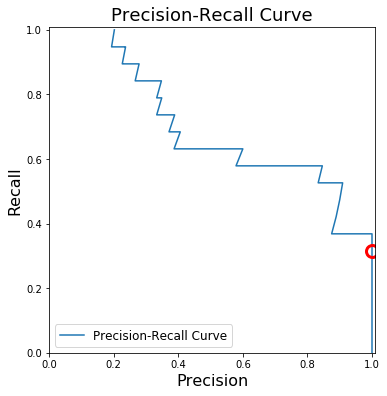

In [29]:
from sklearn.metrics import precision_recall_curve

y_scores = LR_clf.decision_function(X_valid)
precision, recall, thresholds = precision_recall_curve(y_valid, y_scores)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure(figsize=(6, 6))
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.title('Precision-Recall Curve', fontsize=18)
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.legend(loc='lower left', fontsize=12)
plt.axes().set_aspect('equal')
plt.show()

### F1 score
F1-score is used when you want to seek a balance between precision and recall. It is the [Harmonic mean](https://en.wikipedia.org/wiki/Harmonic_mean) between precision and recall. 

$$ F1 = 2 * \frac{1}{\frac{1}{Precision} + \frac{1}{Recall}} = 2 * \frac{Precision * Recall}{Precision + Recall} $$.

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_valid, y_predicted)
precision = precision_score(y_valid, y_predicted)
recall = recall_score(y_valid, y_predicted)
f1 = f1_score(y_valid, y_predicted)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1:', f1)

Accuracy: 0.86
Precision: 1.0
Recall: 0.2631578947368421
F1: 0.4166666666666667


### Area Under ROC curve:

ROC (Receiver Operating Characteristic) curve tells us how good is a classifier in **predicting the difference between two classes**. The binary classifier usually outputs the probability that an observation belongs to the positive class. If the probabilities for most observations are closer to 0 or 1, it is considered good in distinguish the two classes, whereas it is said to perform poorly if most probabilities are closer to 0.5. 

$$\text{True Positive Rate (TPR)} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP) + False Negatives (FN)}}
= \frac{\text{True Positives (TP)}}{\text{Total Actual Positives}}$$

$$\text{False Positive Rate (FPR)} = \frac{\text{False Positives (FP)}}{\text{False Positives (FP) + True Negatives (TN)}}
= \frac{\text{False Positives (FP)}}{\text{Total Actual Negatives}}$$

* True Positive Rate (TPR) is percentage of positive observations that are classified correctly and we want to maximize it. 
* False Positive Rate (FPR) is percentage of negative observations that are classified incorrectly and we want to minimize it. 

Note that True Positive Rate is same as the recall above, but False Positive Rate is entirely different from the precision, as discussed below. 

ROC curve is calculated by plotting the True Positive Rate vs False Positive Rate for various threshold values for the probability. The area under ROC curve is used as a measure of how well the classifier distinguish between positive and negative classes. The greater the area, the better is the classifier. 

The lesser the overlap, the fewer the false positives and false negatives and higher the AUC ROC score. 

![](https://cdn-images-1.medium.com/max/2000/1*AgDJbm6d8qr8ESHNv6VvKg.png)
![](https://cdn-images-1.medium.com/max/2000/1*KNhNw8BsjbIETPF_BH8Qpg.png)

Note: In all the examples illustrated here, the positive and negative classes are more or less balanced.

The points on the ROC curve represents True Positive Rate and False Positive Rate for different values of the threshold for probability. When we decrease the threshold to correctly classify the positive observations and thereby increase True Positive Rate, we end up increasing False Positive Rate by misclassifying some negative observations as positives. The following gif illustrates how moving the decision thresholds corresponds to the points in the ROC curve. 

![](https://www.spectrumnews.org/wp-content/uploads/2016/08/fig-2-1.gif)

The area under the ROC curve is inversely proportional to the overlap between the probabilities for the two classes as predicted by the classifier. The following gif shows how the curve changes with the overlap in the classes.

![](https://www.spectrumnews.org/wp-content/uploads/2016/08/fig-3-1.gif)

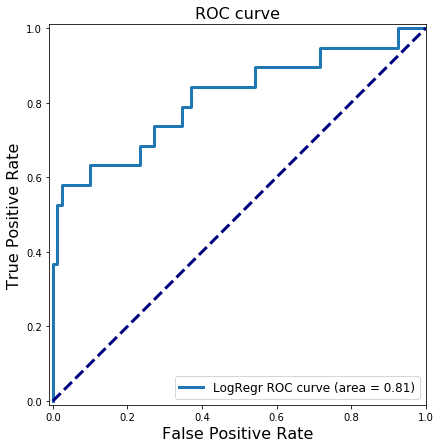

In [31]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_valid, y_scores)
roc_auc_lr = auc(fpr, tpr)

plt.figure(figsize=(7, 7))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

### Comparing Precision-Recall  and ROC curve:

Both the Precision-Recall  and ROC curves try to capture the trade-off between false positives and false negatives. True Positive Rate is nothing but the accuracy of the positive class whereas False Positive Rate measures the inaccuracy of the negative class. Thus, ROC curve studies the trade-off between the accuracy of two classes without weighing one class over the other. Precision-recall curve is [preferable](https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/) to ROC curve in case of imbalanced classes. Precision-recall curve focuses on two aspects - how accurately and completely do we classify the positive class? Precision and/or recall are useful when our dataset contains fewer positive examples and we are more concerned about accurately and/or completely classifying them. 

In the confusion matrix, the two horizontal ellipsis corresponds to TPR (or recall) and FPR whereas the vertical one corresponds to Precision.

![](https://github.com/AashitaK/ML-Workshops/blob/master/Session%204/figures/Binary_confusion_matrix.png?raw=true)

* Black: Precision
* Purple: Recall and True Positive Rate (TPR)
* Pink: False Positive Rate (FPR)

Note: The arrangement of rows and columns in this matrix is different from the one at the top. Scikit-learn follows the convention of the matrix at the top.

The formulations for quick reference:

$$\text{Precision} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP) + False Positives (FP)}}
= \frac{\text{True Positives (TP)}}{\text{Total Predicted Positives}}$$

$$\text{Recall} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP) + False Negatives (FN)}}
= \frac{\text{True Positives (TP)}}{\text{Total Actual Positives}}$$

$$\text{True Positive Rate (TPR)} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP) + False Negatives (FN)}}
= \frac{\text{True Positives (TP)}}{\text{Total Actual Positives}}$$

$$\text{False Positive Rate (FPR)} = \frac{\text{False Positives (FP)}}{\text{False Positives (FP) + True Negatives (TN)}}
= \frac{\text{False Positives (FP)}}{\text{Total Actual Negatives}}$$

Further material that would be very useful, from the [Machine Learning workshop series at HMC](http://www.aashitak.com/ML-Workshops/).
* Regression:

    * The [notebook on regression algorithms](https://www.kaggle.com/aashita/regression-algorithms) is meant to be a gentle introduction overviewing the regression algorithms - lasso and ridge - by introducing the concept of regularization. We would use [House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview) dataset from a Kaggle competition to learn the algorithms. 
    * In the [exercise notebook](https://www.kaggle.com/aashita/exercise-3), you will tackle the [Bike Sharing Demand](https://www.kaggle.com/c/bike-sharing-demand/overview) dataset from another Kaggle competition and apply the regression algorithms.
    
* Classification:

    * The [notebook on classification algorithms](https://www.kaggle.com/aashita/classification-algorithms) contains a brief overview and implementation of various other classification algorithms such as Decision Trees, k-Nearest Neighbors, Support Vector Machines (SVM), Random Forest as well as the technique of Voting Classifiers. Note that the earlier part of the notebook on Logistic Classifier is already covered here.
    
    * The [exercise notebook](https://www.kaggle.com/aashita/exercise-4) for the Titanic dataset has the data preprocessed with the similar steps that we used in the Session 1 of this workshop. You are encouraged to train models using various classification algorithms and find the optimal one. 

All of the above notebooks are also available in the [Session 2 folder of the Github repository](https://github.com/CMC-QCL/A-hands-on-introduction-to-Machine-Learning-using-Python-on-Kaggle) for the workshop.

### Acknowledgements:
The credits for the images used above are as follows.
- Image 1: https://commons.wikimedia.org/wiki/File:Gaussian_kernel_regression.png
- Image 2: http://www.ken-szulczyk.com/misc/statistical_lecture_10.php
- Image 3: https://rasbt.github.io/mlxtend/user_guide/general_concepts/gradient-optimization/
- Images 4, 5, 6, 7: http://www.ken-szulczyk.com/misc/statistical_lecture_10.php
- Image 8 and 10: https://github.com/trekhleb/machine-learning-octave/tree/master/logistic-regression
- Image 9 and 13: https://towardsdatascience.com/derivative-of-the-sigmoid-function-536880cf918e
- Image 14: https://commons.wikimedia.org/wiki/File:Overfitting.svg
- Image 15: https://vitalflux.com/wp-content/uploads/2015/02/fittings.jpg
- Image 16: https://docs.aws.amazon.com/machine-learning/latest/dg/model-fit-underfitting-vs-overfitting.html
- Image 17: https://i.stack.imgur.com/rpqa6.jpg
- Image 18: https://tex.stackexchange.com/questions/434358/draw-customized-table-with-tikz
- Image 19: https://www.researchgate.net/figure/Example-application-of-principal-component-analysis-to-simple-synthetic-data-The-black_fig7_320410861
- Image 20: https://sebastianraschka.com/Articles/2014_python_lda.html

- Image 21: https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/
- Image 22: https://i.stack.imgur.com/W7I4r.png
- Image 24: https://www.qualtrics.com/support/stats-iq/analyses/regression-guides/confusion-matrix-precision-recall-tradeoff/
- Image 25: https://docs.aws.amazon.com/machine-learning/latest/dg/binary-classification.html
- Image 23, 26 and 27: https://medium.com/greyatom/lets-learn-about-auc-roc-curve-4a94b4d88152
- Image 28 and 29: https://www.spectrumnews.org/opinion/viewpoint/quest-autism-biomarkers-faces-steep-statistical-challenges/
- Image 30: https://en.wikipedia.org/wiki/File:Binary_confusion_matrix.png